In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

# Preview the data
print(df.head())



   PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                         0            1          60th       0   
1                         0            1          60th       0   
2                         0            1          60th       0   
3                         0            1          60th       0   
4                         0            1          60th       0   

   DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  ...  \
0                 0.0                 1.0                 1.0  ...   
1                 0.0                 1.0                 1.0  ...   
2 

In [3]:
# Check the shape of the dataset (rows and columns)
df.shape

(1925, 231)

In [4]:
# Get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [5]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
!pip install seaborn


In [7]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

print(df.isnull().sum())

PATIENT_VISIT_IDENTIFIER               0
AGE_ABOVE65                            0
AGE_PERCENTIL                          0
GENDER                                 0
DISEASE GROUPING 1                     5
DISEASE GROUPING 2                     5
DISEASE GROUPING 3                     5
DISEASE GROUPING 4                     5
DISEASE GROUPING 5                     5
DISEASE GROUPING 6                     5
HTN                                    5
IMMUNOCOMPROMISED                      5
OTHER                                  5
ALBUMIN_MEDIAN                      1104
ALBUMIN_MEAN                        1104
ALBUMIN_MIN                         1104
ALBUMIN_MAX                         1104
ALBUMIN_DIFF                        1104
BE_ARTERIAL_MEDIAN                  1104
BE_ARTERIAL_MEAN                    1104
BE_ARTERIAL_MIN                     1104
BE_ARTERIAL_MAX                     1104
BE_ARTERIAL_DIFF                    1104
BE_VENOUS_MEDIAN                    1104
BE_VENOUS_MEAN  

In [8]:
# Calculate missing values count and percentage
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Combine into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
}).sort_values(by='Missing Percentage', ascending=False)

print(missing_summary)

                                  Missing Count  Missing Percentage
ALBUMIN_MAX                                1104           57.350649
ALBUMIN_DIFF                               1104           57.350649
BE_ARTERIAL_MEDIAN                         1104           57.350649
BE_ARTERIAL_MEAN                           1104           57.350649
BE_ARTERIAL_MIN                            1104           57.350649
ALBUMIN_MEAN                               1104           57.350649
ALBUMIN_MEDIAN                             1104           57.350649
BIC_ARTERIAL_MAX                           1104           57.350649
BIC_ARTERIAL_DIFF                          1104           57.350649
BIC_VENOUS_MEDIAN                          1104           57.350649
BIC_VENOUS_MEAN                            1104           57.350649
BIC_VENOUS_MIN                             1104           57.350649
BIC_VENOUS_MAX                             1104           57.350649
BIC_ARTERIAL_MEAN                          1104 

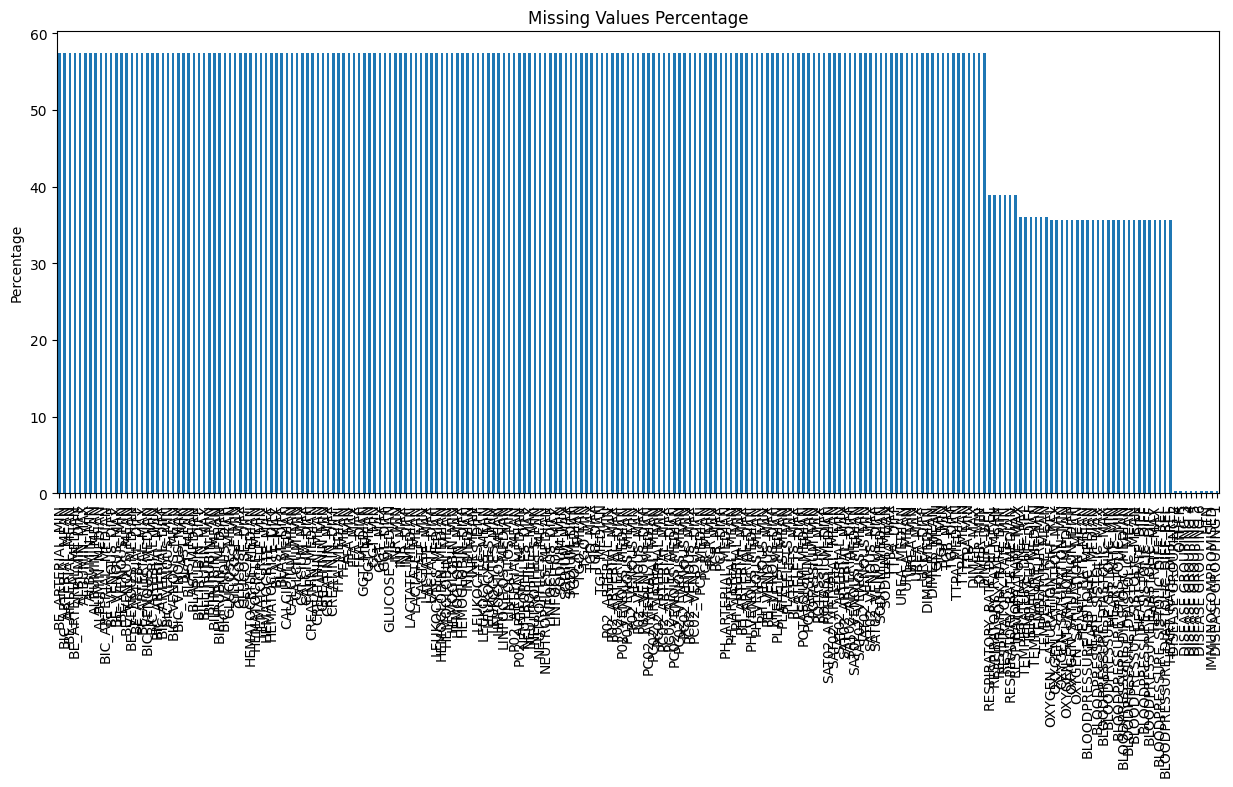

In [9]:
# Check missing values percentage for all columns
missing_percentage = (df.isnull().sum() / df.shape[0]) * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage.sort_values(ascending=False).plot(kind='bar', figsize=(15, 6))
plt.title("Missing Values Percentage")
plt.ylabel("Percentage")
plt.show()

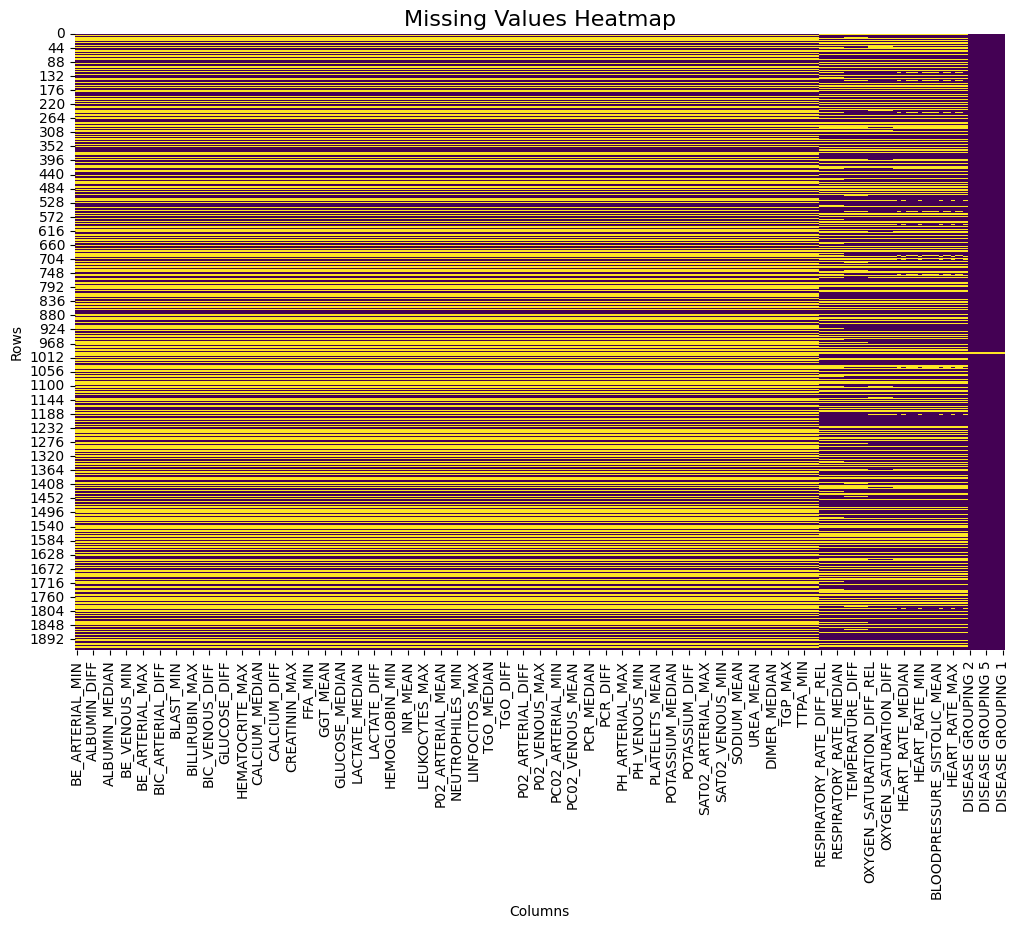

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Filter columns with missing values
missing_cols = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Create a heatmap to visualize missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df[missing_cols.index].isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

In [58]:
''' At first I wanted to drop the columns with more than 65% missing values and I wrote the code but then I did research and 
I decided to use different aproach because thatcould lead to the loss of potentially useful features if the missing data isn't handled carefully.

# Calculate the percentage of missing values in each column after imputation
missing_percentage = df_cleaned.isnull().mean() * 100

# Identify columns where more than 65% of the values are missing
columns_to_drop = missing_percentage[missing_percentage > 65].index

# Drop those columns from the dataframe
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Check which columns were dropped
print(f"Columns dropped due to more than 65% missing values: {columns_to_drop}")
print("\nRemaining columns:")
print(df_cleaned.columns) '''


In [11]:
# Drop rows where the target variable ('ICU') has missing values.
# This ensures that we only work with rows where we know whether the patient was admitted to the ICU, 
# which is critical for the model's predictions. Removing rows with missing target values helps avoid bias in the model.
df_cleaned = df.dropna(subset=['ICU'])

# Impute missing values in numerical columns (columns with 'int64' or 'float64' data types).
# Missing numerical data is replaced with the median value of each column. The median is a robust statistic 
# and works well for handling outliers, as it is less sensitive than the mean. This approach helps maintain 
# the distribution of numerical data without introducing significant bias.
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].median())

# Impute missing values in categorical columns (columns with 'object' data types).
# For categorical data, we replace missing values with the most frequent value (mode) in each column. 
# Using the mode ensures that the imputation is based on the most common category, which is a reasonable assumption 
# when we don't have enough data for a particular category. This prevents losing rows with incomplete categorical data.
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Check if there are any remaining missing values in the dataset after imputation.
# This step helps to ensure that our imputation process has successfully filled all the missing values.
# If there are any missing values left, we may need to investigate further or apply additional imputation strategies.
df_cleaned.isnull().sum()



PATIENT_VISIT_IDENTIFIER            0
AGE_ABOVE65                         0
AGE_PERCENTIL                       0
GENDER                              0
DISEASE GROUPING 1                  0
DISEASE GROUPING 2                  0
DISEASE GROUPING 3                  0
DISEASE GROUPING 4                  0
DISEASE GROUPING 5                  0
DISEASE GROUPING 6                  0
HTN                                 0
IMMUNOCOMPROMISED                   0
OTHER                               0
ALBUMIN_MEDIAN                      0
ALBUMIN_MEAN                        0
ALBUMIN_MIN                         0
ALBUMIN_MAX                         0
ALBUMIN_DIFF                        0
BE_ARTERIAL_MEDIAN                  0
BE_ARTERIAL_MEAN                    0
BE_ARTERIAL_MIN                     0
BE_ARTERIAL_MAX                     0
BE_ARTERIAL_DIFF                    0
BE_VENOUS_MEDIAN                    0
BE_VENOUS_MEAN                      0
BE_VENOUS_MIN                       0
BE_VENOUS_MA

In [12]:
# Check missing values in specific columns
columns_with_nan = ['TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 
                    'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL']

print(df_cleaned[columns_with_nan].isnull().sum())


TEMPERATURE_DIFF                    0
OXYGEN_SATURATION_DIFF              0
BLOODPRESSURE_DIASTOLIC_DIFF_REL    0
HEART_RATE_DIFF_REL                 0
RESPIRATORY_RATE_DIFF_REL           0
dtype: int64


In [15]:
print(df_cleaned.describe())

       PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1925.000000   
mean                 192.000000     0.467532     0.368831            0.108052   
std                  111.168431     0.499074     0.482613            0.310527   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1925.000000         1925.000000         1925.000000   
mean             0.028052            0.097662            0.019740   
std              0.165164            0.296935            0.1391

In [16]:
#investigated if everything was cleaned 
print(df_cleaned[df_cleaned['BLOODPRESSURE_DIASTOLIC_DIFF_REL'] == 'NaN'])

Empty DataFrame
Columns: [PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, AGE_PERCENTIL, GENDER, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, OTHER, ALBUMIN_MEDIAN, ALBUMIN_MEAN, ALBUMIN_MIN, ALBUMIN_MAX, ALBUMIN_DIFF, BE_ARTERIAL_MEDIAN, BE_ARTERIAL_MEAN, BE_ARTERIAL_MIN, BE_ARTERIAL_MAX, BE_ARTERIAL_DIFF, BE_VENOUS_MEDIAN, BE_VENOUS_MEAN, BE_VENOUS_MIN, BE_VENOUS_MAX, BE_VENOUS_DIFF, BIC_ARTERIAL_MEDIAN, BIC_ARTERIAL_MEAN, BIC_ARTERIAL_MIN, BIC_ARTERIAL_MAX, BIC_ARTERIAL_DIFF, BIC_VENOUS_MEDIAN, BIC_VENOUS_MEAN, BIC_VENOUS_MIN, BIC_VENOUS_MAX, BIC_VENOUS_DIFF, BILLIRUBIN_MEDIAN, BILLIRUBIN_MEAN, BILLIRUBIN_MIN, BILLIRUBIN_MAX, BILLIRUBIN_DIFF, BLAST_MEDIAN, BLAST_MEAN, BLAST_MIN, BLAST_MAX, BLAST_DIFF, CALCIUM_MEDIAN, CALCIUM_MEAN, CALCIUM_MIN, CALCIUM_MAX, CALCIUM_DIFF, CREATININ_MEDIAN, CREATININ_MEAN, CREATININ_MIN, CREATININ_MAX, CREATININ_DIFF, FFA_MEDIAN, FFA_MEAN, FFA_MIN, FFA_MAX, FFA_DI

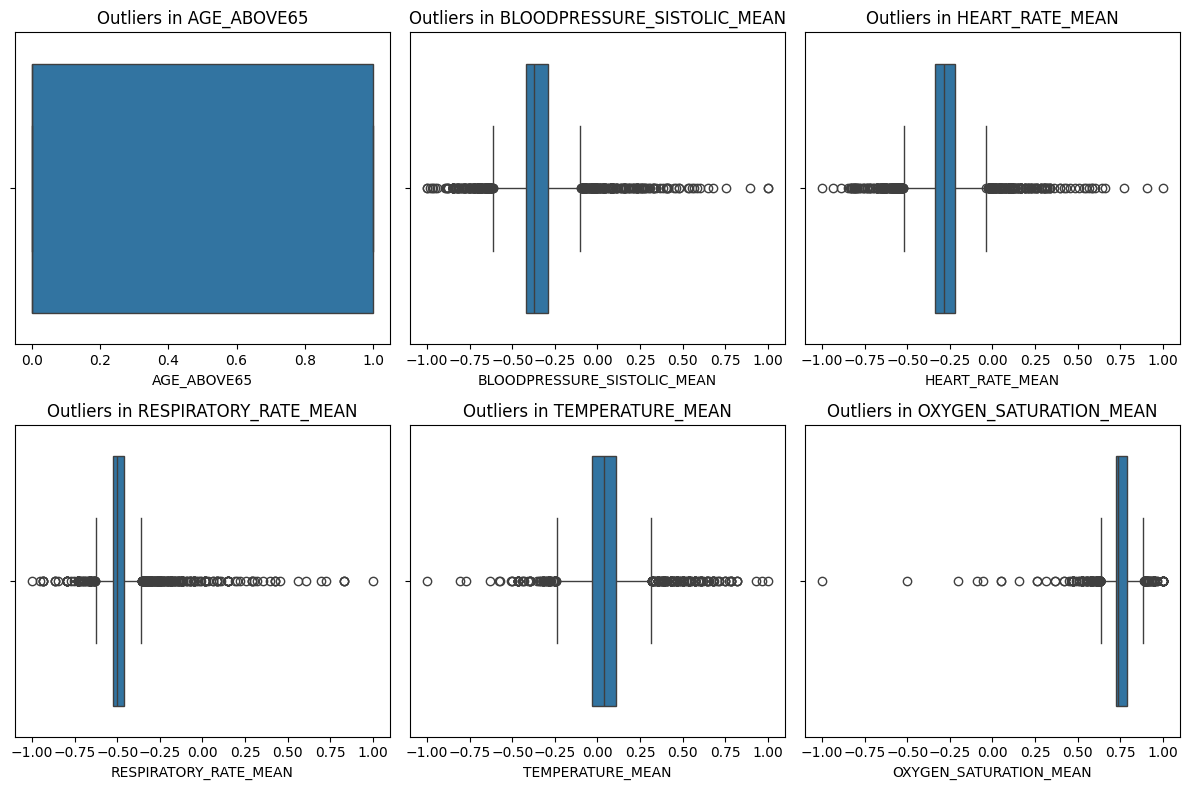

In [13]:
# Visualize outliers in key numerical columns
numerical_columns = [
    'AGE_ABOVE65', 'BLOODPRESSURE_SISTOLIC_MEAN', 'HEART_RATE_MEAN',
    'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN'
]

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


# I decided to not handle the outliers because the results may be correct but too high or too low because of the desease.


In [14]:
# Check for duplicate rows and print them out
duplicates = df[df.duplicated()]
print(duplicates)

# No duplicates 
# Now I'm going to perform exploratory data analysis (EDA) before scaling the data.

Empty DataFrame
Columns: [PATIENT_VISIT_IDENTIFIER, AGE_ABOVE65, AGE_PERCENTIL, GENDER, DISEASE GROUPING 1, DISEASE GROUPING 2, DISEASE GROUPING 3, DISEASE GROUPING 4, DISEASE GROUPING 5, DISEASE GROUPING 6, HTN, IMMUNOCOMPROMISED, OTHER, ALBUMIN_MEDIAN, ALBUMIN_MEAN, ALBUMIN_MIN, ALBUMIN_MAX, ALBUMIN_DIFF, BE_ARTERIAL_MEDIAN, BE_ARTERIAL_MEAN, BE_ARTERIAL_MIN, BE_ARTERIAL_MAX, BE_ARTERIAL_DIFF, BE_VENOUS_MEDIAN, BE_VENOUS_MEAN, BE_VENOUS_MIN, BE_VENOUS_MAX, BE_VENOUS_DIFF, BIC_ARTERIAL_MEDIAN, BIC_ARTERIAL_MEAN, BIC_ARTERIAL_MIN, BIC_ARTERIAL_MAX, BIC_ARTERIAL_DIFF, BIC_VENOUS_MEDIAN, BIC_VENOUS_MEAN, BIC_VENOUS_MIN, BIC_VENOUS_MAX, BIC_VENOUS_DIFF, BILLIRUBIN_MEDIAN, BILLIRUBIN_MEAN, BILLIRUBIN_MIN, BILLIRUBIN_MAX, BILLIRUBIN_DIFF, BLAST_MEDIAN, BLAST_MEAN, BLAST_MIN, BLAST_MAX, BLAST_DIFF, CALCIUM_MEDIAN, CALCIUM_MEAN, CALCIUM_MIN, CALCIUM_MAX, CALCIUM_DIFF, CREATININ_MEDIAN, CREATININ_MEAN, CREATININ_MIN, CREATININ_MAX, CREATININ_DIFF, FFA_MEDIAN, FFA_MEAN, FFA_MIN, FFA_MAX, FFA_DI